# An introduction to git

According to [Wikipedia](https://en.wikipedia.org/wiki/Git):

- **Git** is a distributed version control system designed to track versions of files.
- While Git is primarily used by programmers to collaboratively develop software, it can manage version control for any type of file. 
- One of Git's unique features is that it maintains a complete local copy of the entire repository (commonly referred to as a **repo**). 
  This independence from network access or a central server sets Git apart from other tools.
- For collaboration, Git enables synchronization with repositories on **remote** machines. 
  Although all repositories with the same history are considered peers, developers often rely on a central server.

Git’s decentralized design makes it a powerful tool for both individual developers and teams working on complex projects.

## 1. Using git locally

A bit of magic, not important:

In [ ]:
%%bash
./reset_for_part1.sh

ok, let's start by creating an (empty) repo:

In [ ]:
%%bash
mkdir example-part-1
cd example-part-1
git init

Another bit of Jupyter magic, not important for you:

In [ ]:
%cd example-part-1

### Snapshot (*commit*)

Now, let's create a first snapshot (*i.e.*, a **commit**):

In [ ]:
%%bash
# create a file
echo "Hello git!" > file1
# add it and create a commit
git add file1
git commit -m "A first commit"

Note that:

+ By default, a file is not tracked, so one needs to `git add` it.
+ In practice, delta are stored, not files.
+ The commit message could be whatever you want, but people generally report what has changed.

### Making and adding changes

The `git status` provides the state of the repo:

In [ ]:
%%bash
git status

Let's introduce a change:

In [ ]:
%%bash
echo "changed" > file1
git status

As indicated by the output, using `git commit` would report no change (and would refuse to commit). Indeed, you **need** to do `git add file1`. When you do so, the you add are **staged**, *i.e.*, ready to become part of the next commit.

Another option is to use:

In [ ]:
%%bash
git commit -a -m "add file1"  # or `git -am "..."`

And then, you can see the history of your commits with:

In [ ]:
%%bash
git log

You can, of course, add multiple file at once, or even directories (with **all** their content):

In [ ]:
%%bash
# add multiple files
echo "another" > file2
echo "another other" > file3
git add file2 file3
# add a directory and all(!) its content
mkdir directory
echo "another other other" > directory/file4
git add directory

The status now indicates:

In [ ]:
%%bash
git status

Let's commit that:

In [ ]:
%%bash
git commit -am "add stuffs"

However, there are some file that you do not want to version (intermediate files, compiler logs, etc) → add them to a `.gitignore` file:

In [ ]:
%%bash
echo "a log file" > test.log
git status 

So far, nothing new. But if I add a rule into `.gitignore`, then:

In [ ]:
%%bash
echo "*.log" > .gitignore
git add .gitignore
git status 

... The `test.log` file is not listed. Even better, I cannot add it by mistake:

In [ ]:
%%bash --no-raise-error
git add test.log

In practice:

+ Add one rule per line (you can use wildcards, as seen above).
+ Use <https://gitignore.io> to generate a `.gitignore` file that fits your repo.

### Branching and navigating

So far, the history is linear. But it could be nice to have to work on different things at the same time. So git introduced the concept of **branches**. In fact, git is not very useful if you work only a single branch (say, `main`), appart for the history of the modifications.

```mermaid
    gitGraph
       commit
       commit
       branch new-feature
       commit
       checkout main
       commit
       branch another-feature
       commit
```

(note: this example is ficticious)

The first branch is called `main` (or `master`, in older version of git). Good practices recommand that you keep that branch "clean", and that you do any heavy work in a separate branch that you can later "reconcile" with your main branch.

To create a new branch **from the current commit**:

In [ ]:
%%bash
git switch -c new-feature  # or `git checkout -b new-feature`

Let's make some changes in that branch, for the fun of it:

In [ ]:
%%bash
echo "content for new branch" > file1
git commit -am "add new feature"

It is, of course, possible to switch from one branch to another (**once you have commited all changes**):

In [ ]:
%%bash 
cat file1
git switch main  # or `git checkout main`
cat file1

Note that you can walk trough history by different means:

+ The `git checkout` command allow you to move through history (*i.e.*, move the **index**). When you look at `git log`, you can see that all commit are associated with a hash (a long hexadecimal number). Using `git checkout xxxxxx` move you to that point. Note that it is not recommended to directly edit files from a random point in time (unless it is the last commit of the branch, of course). You can however start a new branch from that point and deal with the consequences later ;)
+ Another way to visualize changes (without moving in time) is to use `git diff xxxxxx`, which will display the changes since that commit (although in the so-called *diff* format).

In [ ]:
%%bash
git switch new-feature
git log
# git diff 125b7f2

... So to actually navigate history and visualize, it might be easier to use graphical tools ;)

### Merging branches

So far (according to `git log`), we are in this kind of situation:

```mermaid
    gitGraph
       commit id: "A first commit"
       commit id: "add file1"
       commit id: "add stuffs"
       branch new-feature
       commit id: "add new feature"
```

Say we are happy with the changes done in `new-feature` and we want to incorporate them in `main`. This operation is a *merge*:

In [ ]:
%%bash
# switch back to main
git switch main
# merge new-feature into main
git merge new-feature

We will see later that this may result in conflicts, but this is not the case here.

The result of this operation is:

```mermaid
    gitGraph
       commit id: "A first commit"
       commit id: "add file1"
       commit id: "add stuffs"
       branch new-feature
       commit id: "add new feature"
       checkout main
       merge new-feature
```

Which is actually equivalent to:

```mermaid
    gitGraph
       commit id: "A first commit"
       commit id: "add file1"
       commit id: "add stuffs"
       commit id: "add new feature"
```

So the change is incorporated in `main`. Now that we are done with `new-feature`, we can delete it:

In [ ]:
%%bash
git branch -d new-feature

Note that you can also tag the current commit, so that it has a special meaning (and you can easily `git checkout THE_TAG` if any):

In [ ]:
%%bash
git tag v0.2

### Dealing with conflicts: a first approach

Let's create a conflict by editing the same file in two different branches:

In [ ]:
%%bash
# create a new branch and edit file2
git switch -c another-feature
echo "edited in branch another-feature" > file2
git commit -am "edit file2 in branch another-feature"
# switch back to main and also edit file2
git switch main
echo "edited in branch main" > file2
git commit -am "edit file2 in branch main"

Now, if we try to merge `another-feature` in `main`, it reports a conflict:

In [ ]:
%%bash --no-raise-error
git merge another-feature

Note that you cannot continue to use git if you don't resolve the conflict (but you can cancel the whole operation with `git merge --abort`).

The content of the file clearly indicates the conflict:

In [ ]:
%%bash
cat file2

Here, the `=======` line indicates the divergence. All the content above this line and after `<<<<<<< HEAD` line is content that exists in the current branch. Furthermore, all content below this line and before `>>>>>>> another feature` is content that is present in the other branch.

To solve the conflict, just make up your mind on what should be the content, `git add` the conflicting file and commit the result. If you know which version is the good one, you can however use `git checkout` with `--our` (take the version of the current branch) or `--their` (take the version of the merging branch). For example:


In [ ]:
%%bash
git checkout --their file2
cat file2

or:

In [ ]:
%%bash
git checkout --our file2
cat file2

And if we commit, we are good to go:

In [ ]:
%%bash
git commit -am "solve conflict"
git log HEAD~2..HEAD

As you can see, the history now contains all commits plus the commit to solve the conflict. We will see below that there are other strategies to deal with conflicts ;)

### Going further

We have covered the most useful commands (there are still a few worth of our attention below). However, to do more complicated stuffs (and mess up your history if you really want to), you can check:

+ `git revert`: make a new commit that revert the effect of a previous one,
+ `git reset`: move the history back to a previous commit, and discard all that comes after,
+ `git commit --amend`: add the current changes to the previous commit (you can also change the commit message with `-am "xxx"`, as usual).
+ `git squash`: merge different commits into one.
+ `git cherry-pick`: select different commit from anywhere in your history and apply them in the current branch.

## 2. Working with a remote (that you created or on which you can write)

**Many of the commands in this section needs to be adapted to works in your case.**

In preamble: a bit of black magic so that everything works:

In [ ]:
%%bash
../reset_for_part2.sh

So far, our repo only exists in our computer. This is not very useful for sharing (or collaborative work, se below), so one needs to synchronize it with a *remote* location. Let's consider two platforms (there are other, with similar workflows): Github and Gitlab (the latter is available at UNamur at <https://gitlab.unamur.be>).

### Create a repository on a remote and synchronize with it

On github, the first step is to create a **new repository**:

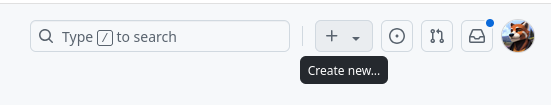

On gitlab, you need to create a **new project**:

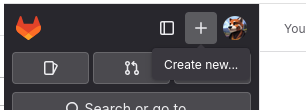

In both cases, once the repo is created, the next step is to add the remote (which is conventionaly called `origin`):

In [ ]:
%%bash
# add remote
git remote add origin git@github.com:pierre-24/test-repo-git.git

**Note:** for this to work, you need to have configured Github/Gitlab with a SSH key (see <https://docs.github.com/en/authentication/connecting-to-github-with-ssh/generating-a-new-ssh-key-and-adding-it-to-the-ssh-agent> and then <https://docs.github.com/en/authentication/connecting-to-github-with-ssh/adding-a-new-ssh-key-to-your-github-account>, similar procedures exists for gitlab). It is good practice to do so.

Next step is to send your `main` branch to the repo:

In [ ]:
%%bash
git push -u origin main

Notice that the output mention that, thanks to `-u` (`--upstream`), `main` is set up to track `origin/main`, which is a copy of the former in the repo. Both branches are linked, and local/remote change can be easily synchronized, as we will see later.

### Sending your changes to `origin`

Now, you need to regularly synchronize with `origin`. Let's introduce a new commit:

In [ ]:
%%bash
echo "yet another change" > file1
git commit -am "yet another change"

Rigth now, this commit is not yet in the remote repo, as seen in <https://github.com/pierre-24/test-repo-git/commits/main/>. To send it:

In [ ]:
%%bash
git push

No need to use `git push origin main`, as git knows that `main` tracks `origin/main`.

If you create a new branch, you also need to push it:

In [ ]:
%%bash
# create a new branch for the fun of it
git switch -c an-example-branch
# make a commit in that branch
echo "modified" > file1
git commit -am "yet another example"
# now, send it to origin
git push -u origin an-example-branch

This new branch is now visible at <https://github.com/pierre-24/test-repo-git/branches>. We'll see below that it is possible to do the merge on Github (and it is generally preferable), but if you do it manually, just use `git push` at the end:

In [ ]:
%%bash
git switch main
git merge an-example-branch
git push

And now, as seen at <https://github.com/pierre-24/test-repo-git/commits/main/>, this last commit is there. You may want to delete your branch on the remote at <https://github.com/pierre-24/test-repo-git/branches>, thought.

By the way, you know enough to understand this joke:

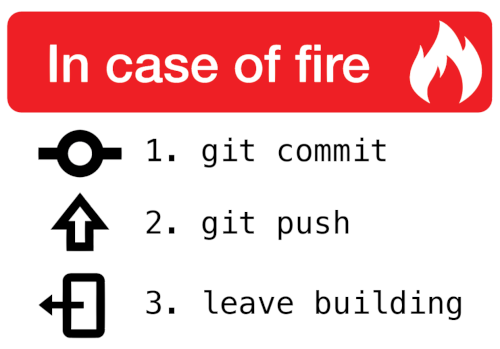

### Getting changes from the remote

As mentioned above, good practice is that you keep `main` up to date with the latest development, but do not directly make change in it (rather, you create a new branch, make changes there, tests them, and when you are happy, you *merge* back to `main`). This means that, if you start to collaborate, your remote `main` branch should update from time to time, and such change should be reflected locally (otherwise, you'll start to get in trouble since your local and remote history diverges). Let's see how to correctly deal with that.

First of all, to keep in touch with the changes in `origin`, you can do:

In [ ]:
%%bash
git fetch origin

As you can see, there is a new branch, called `origin/a-remote-branch` that exists in the remote (as indicated by the prefix `origin`), and was just created locally. If you want to work on this branch, just switch to it:

In [ ]:
%%bash
git switch a-remote-branch

One can of course introduce more changes (but let's not forget to *push* them):

In [ ]:
%%bash
echo "I start to get out of idea" > file2
git commit -am "changed file2"
git push -u origin a-remote-branch

Github sees our changes and propose us to do a so-called *pull request*:

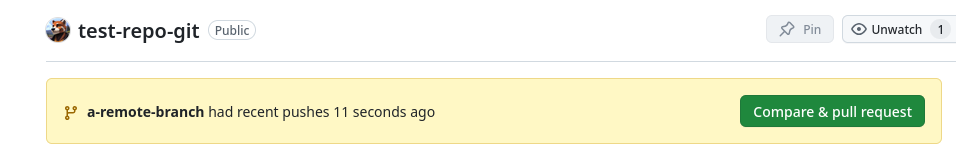

A *pull request* is the way to merge two branches directly on Github, which has its advantages when working collaborativelly (see below).

If this message does not appear, no worry: we can also do that by going in the "Pull requests" tab of the repo:

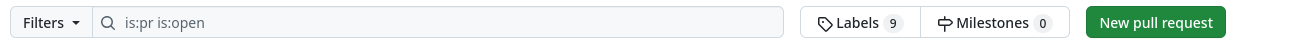

In there, let's request a merge `main` ← `a-remote-branch` (yeah, it is written backward).

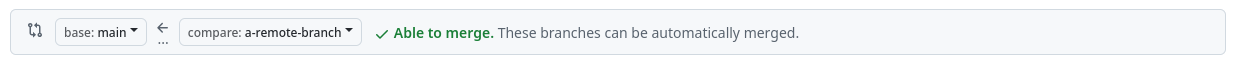

Note that it indicates if there is a conflict or not (more on that latter).

A pull request is created. One can review the changes (**very important**) and accept them, which will trigger a *merge* on the remote side.

The procedure is very similar in *gitlab* (except it is called a *merge request*).

Thus, one needs to update the local `main` branch:

In [ ]:
%%bash
git switch main
git pull

`git` pull is in fact a shortcut for `git fetch` +  `git merge origin/main`.

**In short:** everytime you need to update a local branch so that it reflects the remote branch, use `git pull`.

### Bonus track: GitHub actions

What is nice about GitHub (this is not available [yet?] on the UNamur's gitlab) is that you can run some actions when something happens in you repo. For example:

+ You can automatically run some tests to check wheter the pull request you received did not break anything (more on that in the Python lecture),
+ You can update a website with your documentation (more on that in the Python lecture),
+ and others.

To use that, you need to put a specially formated YAML file in `.github/workflows/`. Let's try that:

In [ ]:
%%bash
# create directory and copy file (see below)
mkdir -p .github/workflows
cp ../tests.yml .github/workflows
# add file, commit, and send:
git add .github/workflows/tests.yml
git commit -am "add test"
git push

The green tick there...

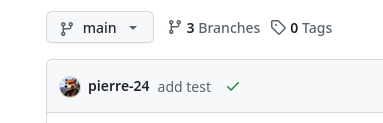

... indicates that the test went well. Now, let's check out the content of this file:

In [ ]:
%%bash
cat .github/workflows/tests.yml

In short (this is a huge topic and I only scratch the surface here, see <https://docs.github.com/en/actions>), the template for a an action file is:

```yaml
on:
  %an-event%
job:
  a-job:
    runs-on: %a-runner%
    steps:
      - step 1
      - setp 2
      - ...
```

where `%an-event%` is an event that happens in the remote (in the example above, this file is triggered on any pull requests that target `main` and any `git push` that targets `main`) and `%a-runner%` is a **virtual machine** set up by Github to run our test (here, the LTS of ubuntu). This is why the first step is necessarly `uses: actions/checkout@v3`, to retrieve our repo there. Then, you can call any command you want, **as long as it is available** (but you can also use `sudo apt-get install` to install tools and stuffs).

Let's now see what this means in practice. If I ever create a branch where `file1` is deleted:

In [ ]:
%%bash
# create a branch (avoid directly working in main):
git switch -c branch-fail-tests origin/main
# delete file (yeah, you can do that):
git rm file1
git commit -am "delete file1"
git push -u origin branch-fail-tests

As indicated in the output, one can directly create a pull request here: <https://github.com/pierre-24/test-repo-git/pull/new/branch-fail-tests>. Let's do so, and...

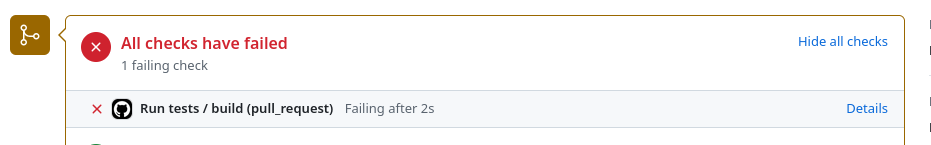

... One should probably not merge that ;)

In practice, it is the responsability of **the person that propose the pull request** to make sure that all tests passes (of course, it can be that modifying the tests is required).

**Note:** it is possible to "protect" a branch by defining a set of rules in the "branches" menu of the "Settings" tab:

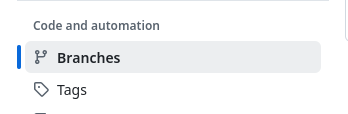

In particular, it is possible to force tests to pass before being abble to merge a pull request:

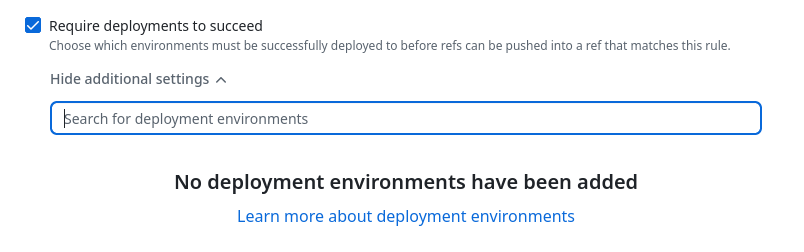

## 3. Collaborating on GitHub

The last interesting case is the one where you want to collaborate to a project located on Github but don't have the right to directly manipulate the repo (which is actually the vast majority of the cases outside our microcosm). The idea here is just to propose a *pull request* that the actual owners can accept :)

### The "git(hub) flow"

Unless otherwise mentionned (check the `README` of the project), most people expect a change to be performed following these different steps:

1. It is generally a good practice (though not mandatory) to start by checking if an **issue** (each repo has a list of issues) concerning your bug/improvment exists. If not, it is good practice (again, not mandatory) to create one: maybe someone else is already on it!
2. Start by *forking* the main repository and work there (see below).
3. Create a new branch, make changes and add commits.
4. Open a pull request.
5. Wait for the reviews, and act accordingly.
6. When everything is all right, the mainteners will merge your request.

Furthermore, many project will adopt a structure that looks in part like this (see <https://nvie.com/posts/a-successful-git-branching-model/>, I let out the *release* and *hotfix* cases, which generally only concerns the mainteners):

```mermaid
gitGraph
       commit tag: "v1.0"
       branch develop
       commit
       branch new-feature
       commit
       commit
       checkout develop
       branch other-feature
       commit
       checkout develop
       merge new-feature
       commit
       merge other-feature
       commit
       checkout main
       merge develop tag: "v1.1"
```

So:

+ The `main` branch (also called `master`) is supposed to contain "released" code that have been toroughly tested and can be distributed to any user (this would correspond to the version you install on your computer as an user). Generally, only the mainteners can write in it, and they generally do so via a pull request from `develop` (which thus represent the next release). Each release is generally tagged.
+ The `develop` branch (also called `dev`) is ahead of `main` (it contains the code that will be released in the next release) and  **is the basis for any new feature**. As a contributor, you should therefore use this branch as the basis of your own branch (see below). It may not be totally stable, since it was not yet toroughly tested. In some software, *nightly builds* are generally based on that branch.
+ The feature branches (which could also be bugfixes) are the one where changes are performed, followed by a pull request to the `develop` branch.

So there are three stages before your code end up being "released": feature → develop → main.
When the project is small, it is ok to skip the `develop` branch (because it is actually a burden, not worth it when you work alone or in small comitee). In fact, a project such as [numpy](https://github.com/numpy/numpy) does not have a `develop` branch (but not everyone is willing to contribute to numpy either).

However (unless it is a *really* small project), it is recommended to keep using feature branches. This is what we did above, and unless your project becomes large, it should be fine.

**In short:** if you want to propose something in a "real" project, you should always base your feature branch on the `develop` (if possible) or `main` (if not) one.

### Collaborating in practice

As mentionned above, one need to "fork" the repository, *i.e.*, create a copy of the repo on which you actually have the right to do anything (see <https://docs.github.com/en/get-started/exploring-projects-on-github/contributing-to-a-project>). It goes like this:

1. fork the repository on Github,
2. clone it,
3. add the parent repo,
4. base any new branch on the parent repo,
5. propose a pull request.

The first step is done thanks to the Github interface, by cliking the "Fork" button:

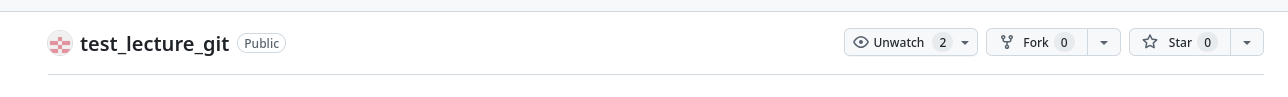

Then, since the repository is on the remote but not our compute, we need to import the repository here (that's step 2). We do that by *cloning* it.

Before that, let's make sure that everything is ok on the Jupyter side:

In [ ]:
%cd ..

... And another one:

In [ ]:
%%bash
./reset_for_part3.sh

Now, let's clone **the fork**. Make sure you use the SSH version...

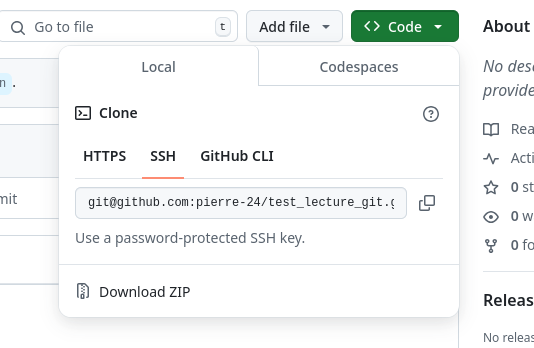

... and then:

In [ ]:
%%bash
git clone git@github.com:pierre-24/test_lecture_git.git

Let's now move in this new repo:

In [ ]:
%cd test_lecture_git

When we clone the repository, it is added as the `origin` remote by default. One can check that by using:

In [ ]:
%%bash
# list the available remotes
git remote
# check a remote in particular
git remote get-url origin

To make sure that we working with the latest developments on the main repo, let's add it as a second remote, generally called `upstream`:

In [ ]:
%%bash
# add the second remote
git remote add upstream git@github.com:n-deveaux/test_lecture_git.git
# fetch what's there
git fetch upstream

Of course, is changes are done on `upstream`, you need to use `git fetch upstream` to get them. So make sure you do that regularly.

To modify the code, make sure that you base your branch **on `upstream`** by using:

In [ ]:
%%bash
git switch -c new-feature upstream/main

Then it is the usual deal: modify stuffs, do commit, send your modifications to `origin`, repeat.

In [ ]:
%%bash
echo "a modification" >> README.md
git commit -am "edit README.md"
git push -u origin new-feature

Again, Github recognize that we are trying to propose a modification, so it proposes to create a pull request:

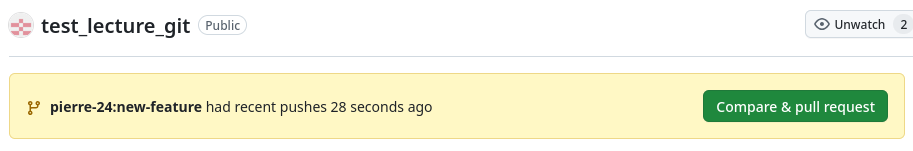

and if not, you can still click the "create pull request" button there, and *compare across forks*:

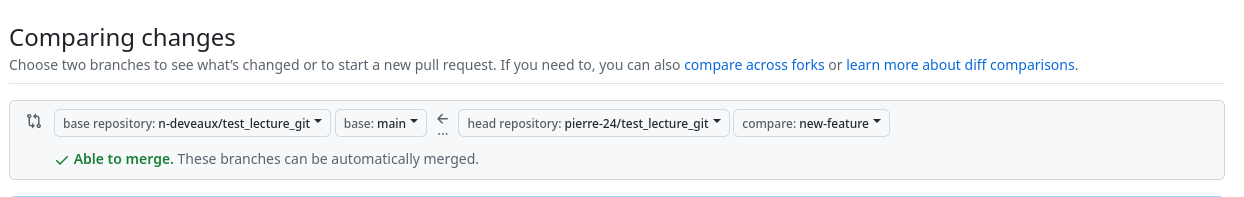

Of course, it only works if you select your forked repository as "head repository". Then, once your pull request is submited, you need to wait patiently for the maintener to get back to you :)

### Dealing with conflicts: a second approach

Above, the conflicts appeared when a file was modified in two different branches and we had to reconciliate them. We did so by going to the main branch, did `git merge` and dealt with conflict at that point. Using that strategy would means that **the maintener is responsible to deal with conflict**, which is a burden if the project become large. So, in practice, it is the other way around: **the person proposing the modification is in charge of proposing something without conflicts**. Let's see how to achieve that.

Say we are in this situation:

```mermaid
gitGraph
       commit id: "commit 1a"
       branch new-feature
       commit id: "commit 2a"
       commit id: "commit 2b"
       checkout main
       commit id: "commit 1b"
       commit id: "commit 1c"
```

and that both `commit 1c` and `commit 2b` targets the same line of the same file. We are thus in a conflicting situation when proposing to merge `new-feature` in `main`.

One strategy would be to use someting like:

```bash
git switch new-feature
git merge main
```

and deal with the conflict as seen above. The result would be:

```mermaid
gitGraph
       commit id: "commit 1a"
       branch new-feature
       commit id: "commit 2a"
       commit id: "commit 2b"
       checkout main
       commit id: "commit 1b"
       commit id: "commit 1c"
       checkout new-feature
       merge main id: "commit 2c: deal with conflicts"
```

While it works, it is a bit messy, since commits from `main` and `new-feature` gets interleaved after merge:

```mermaid
gitGraph
       commit id: "commit 1a"
       commit id: "commit 2a"
       commit id: "commit 2b"
       commit id: "commit 1b"
       commit id: "commit 1c"
       commit id: "commit 2c: deal with conflicts"
```

Most mainteners prefers their history to be **linear** (*i.e.*, each feature is clearly separated in the final history). To achieve such result, one need to perform a **rebase** instead of a *merge*. In practice, this means that we will change the "base" of the `new-feature` to be `commit 1c` instead of `commit 1a`, resulting in:


```mermaid
gitGraph
       commit id: "commit 1a"
       commit id: "commit 1b"
       commit id: "commit 1c"
       branch new-feature
       commit id: "commit 2a'"
       commit id: "commit 2b'"
```

... And a linear history after merge:

```mermaid
gitGraph
       commit id: "commit 1a"
       commit id: "commit 1b"
       commit id: "commit 1c"
       commit id: "commit 2a'"
       commit id: "commit 2b'"
```

Note however that this operation is effectivelly changing *commits* to account for this new stituation (which is marked by primes in the schemes above), which can also results in conflict on its own. However, this is the prefered way to treat conflicts anyway.

Let's put ourselves in this situation:

In [ ]:
%%bash
# switch to main
git switch main
# do a commit
echo "a modification, but on main" >> README.md
git commit -am "edit README.md"
# push our modification (of course, this would not work if I didn't had the right to do so, thanks Noah ;) )
git push -u upstream main

GitHub is not very happy about it and signal a conflict, actually preventing the maintener from merging the pull request:

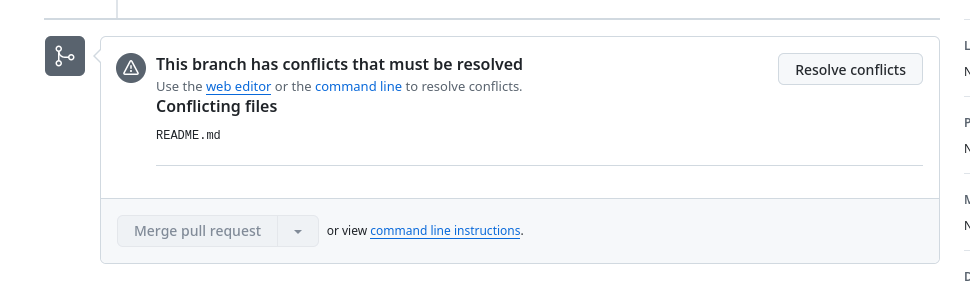

Notice that Github propose its own conflict resolution tool, which effectivelly is the first strategy (a `git merge upstream/main`). So, not what we want.

Let's rebase instead:

In [ ]:
%%bash  --no-raise-error
# always start by fetching, so that you get the latest version of all branches
git fetch upstream
# checkout and rebase
git switch new-feature
git rebase upstream/main

Of course, the conflict is there:

In [ ]:
%%bash
cat README.md

So, let's solve it:

In [ ]:
%%bash
# Use the version from the branch, so --their
git checkout --their README.md
git add README.md
git commit -am "edit README.md"
# continue (and, in fact, finish) the rebase
git rebase --continue
# check if we are good
cat README.md

Notice that we did a `git commit`, so we effectivelly have rewritten this commit to deal with the conflict!

Last step is to update the branch on `origin`. However, since we clearly modified the history, one needs to **force** push:

In [ ]:
%%bash
# notice the -f:
git push -f

This worked as intended, since now GitHub is happy about it:

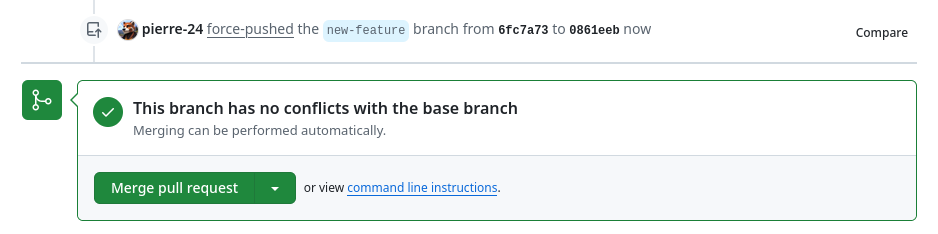

One last thing. As a maintener, we have different options for the merge:

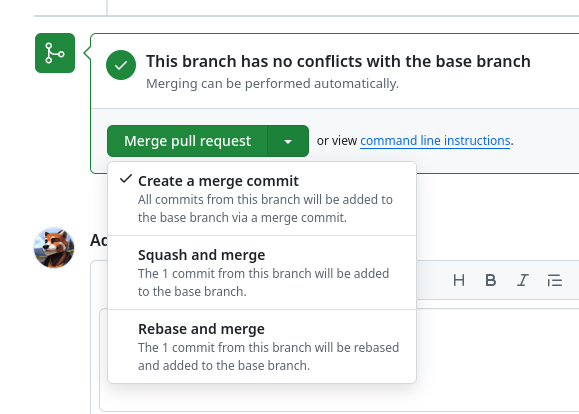

As you can see, the first option correspond to a *merge*, and the last one actually correspond to what we just did (except GitHub does not provide a conflict editor in that case, so it only works when there is no apparent conflict).

The second one is interesting. In git, `git squash` merge multiple commits together. Using this option "squash" all commits of the pull request in one single (big) commit. This is considered good practice by some maintainers.

## 4. Conclusions

In this introduction, I introduced you to the main useful git commands and the general workflows to use them. Don't forget that you can always use `--help` (*e.g.*, `git switch --help`) to learn more about a given command.

To go further, I would recommand the doc at <https://git-scm.com/doc>, which is the official documentation. It also provide a few tutorials, including the one on which this introduction is based (<https://git-scm.com/docs/gittutorial>, which was of great inspiration for part 1 & 2).

Final note: if you end up messing up your history (and it will happen :p ), don't panic. It is always possible to rebuild something clean and gets thing back. It just requires some black magic, generally found on Stack Overflow.